#### Choosing document vectors based on their performance on field classification

In [1]:
import plotnine as pn
import pandas as pd
import numpy as np

from sciterra import Atlas

from sklearn.manifold import TSNE

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### Load Data

We will sample 1,000 embeddings from each of our fields, and see how well they are clustered

In [3]:
atlas_dirs_scibert = {
    "Physics": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=hafenLowredshiftLymanLimit2017",

    "Linguistics": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Imeletal2022",

    "Medicine": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Torres2013",

    "Education": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Ololube2012",

    "Philosophy": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Bacon2019",

    "Economics": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=West2003",

    "Materials Science": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Miele2022",

    "Geology": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=ForeroOrtega2021",

    "Mathematics": "/Users/nathanielimel/uci/projects/citesim/outputs/librarian=S2/vectorizer=SciBERT/center=Andre2018",

}

In [3]:
# This might be memory intensive.

atlases_by_field: dict[str, Atlas] = {
    key: Atlas.load(atlas_dirs_scibert[key]) for key in atlas_dirs_scibert
}


In [4]:
# Get first 100
embeddings_by_field = {
    key: atl.projection.embeddings[:1000]  for key, atl in atlases_by_field.items()
}

In [5]:
# Concatenate, keeping labels
all_embeddings = np.vstack(list(embeddings_by_field.values()))
all_embeddings.shape # (900, 768)

(9000, 768)

In [6]:
labels = np.array([key for key in embeddings_by_field for _ in embeddings_by_field[key]])
labels.shape # (90000,)

(9000,)

In [7]:
# N.B.: takes >X min

# normalize embeddings
embeddings_n = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_n)
embeddings_2d.shape # (90000, 2)

(9000, 2)

In [8]:
df_scibert = pd.DataFrame(
    zip(
        labels,
        embeddings_2d[:,0],
        embeddings_2d[:,1],
    ),
    columns=[
        "field",
        "tsne1",
        "tsne2",
    ],
)
df_scibert.shape

(9000, 3)

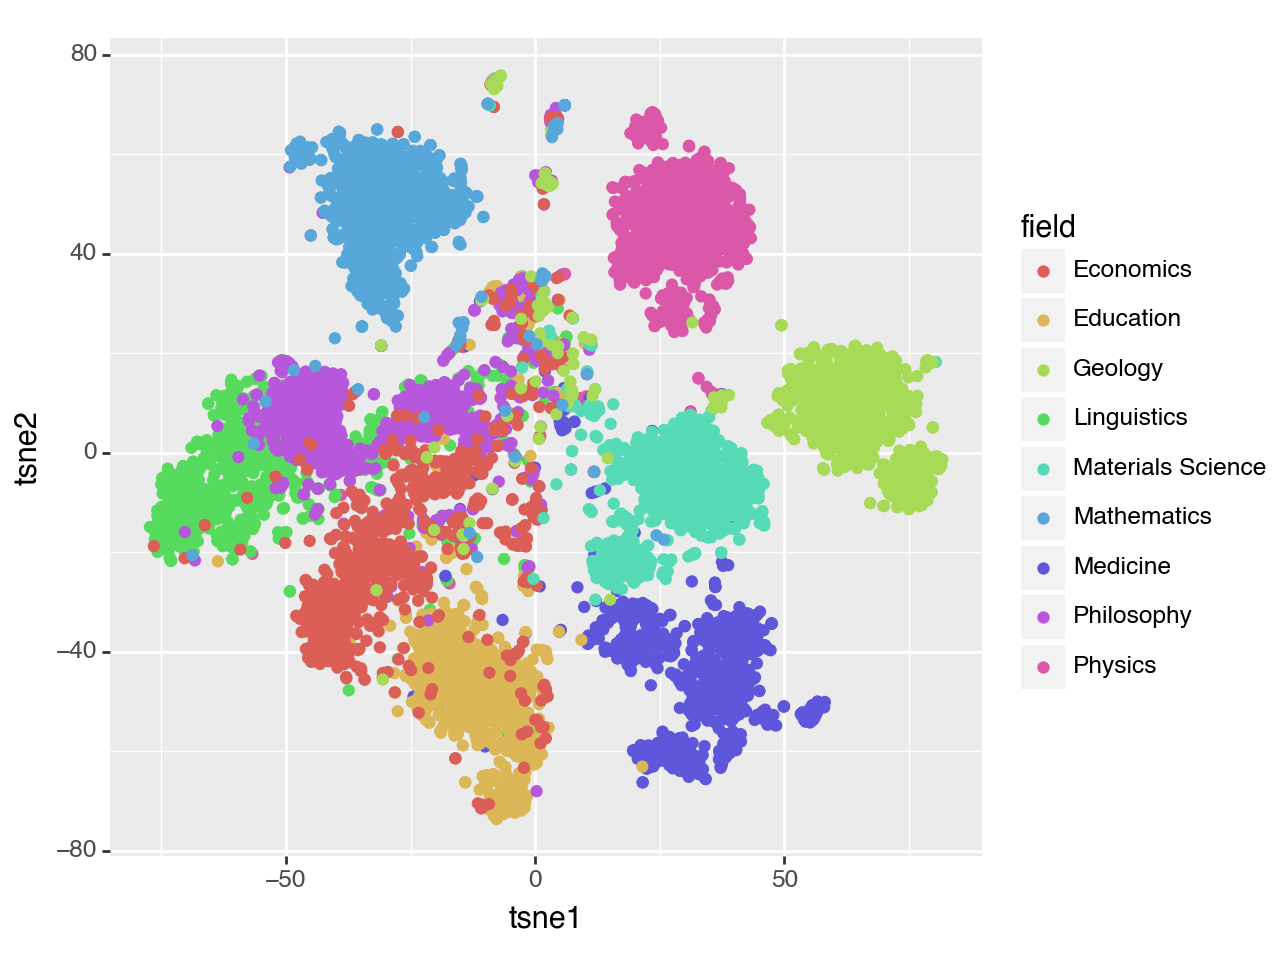

<Figure Size: (640 x 480)>

In [9]:
# Not bad.
(
    pn.ggplot(
        df_scibert,
        pn.aes(
            x="tsne1",
            y="tsne2",
            color="field",
        )
    )
    + pn.geom_point()
)

## SBERT

In [10]:
# Update the directories
atlas_dirs_sbert = {key: val.replace("SciBERT", "SBERT") for key, val in atlas_dirs_scibert.items()}

In [11]:
# This might be memory intensive.

atlases_by_field: dict[str, Atlas] = {
    key: Atlas.load(atlas_dirs_sbert[key]) for key in atlas_dirs_sbert
}


In [12]:
# Get first 100 embeddings
embeddings_by_field = {
    key: atl.projection.embeddings[:1000]  for key, atl in atlases_by_field.items()
}

# Concatenate, keeping labels
all_embeddings = np.vstack(list(embeddings_by_field.values()))
all_embeddings.shape # (900, 768)

labels = np.array([key for key in embeddings_by_field for _ in embeddings_by_field[key]])
labels.shape # (900,)

# N.B.: takes X min

# normalize embeddings
embeddings_n = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_n)
embeddings_2d.shape # (900, 2)


(9000, 2)

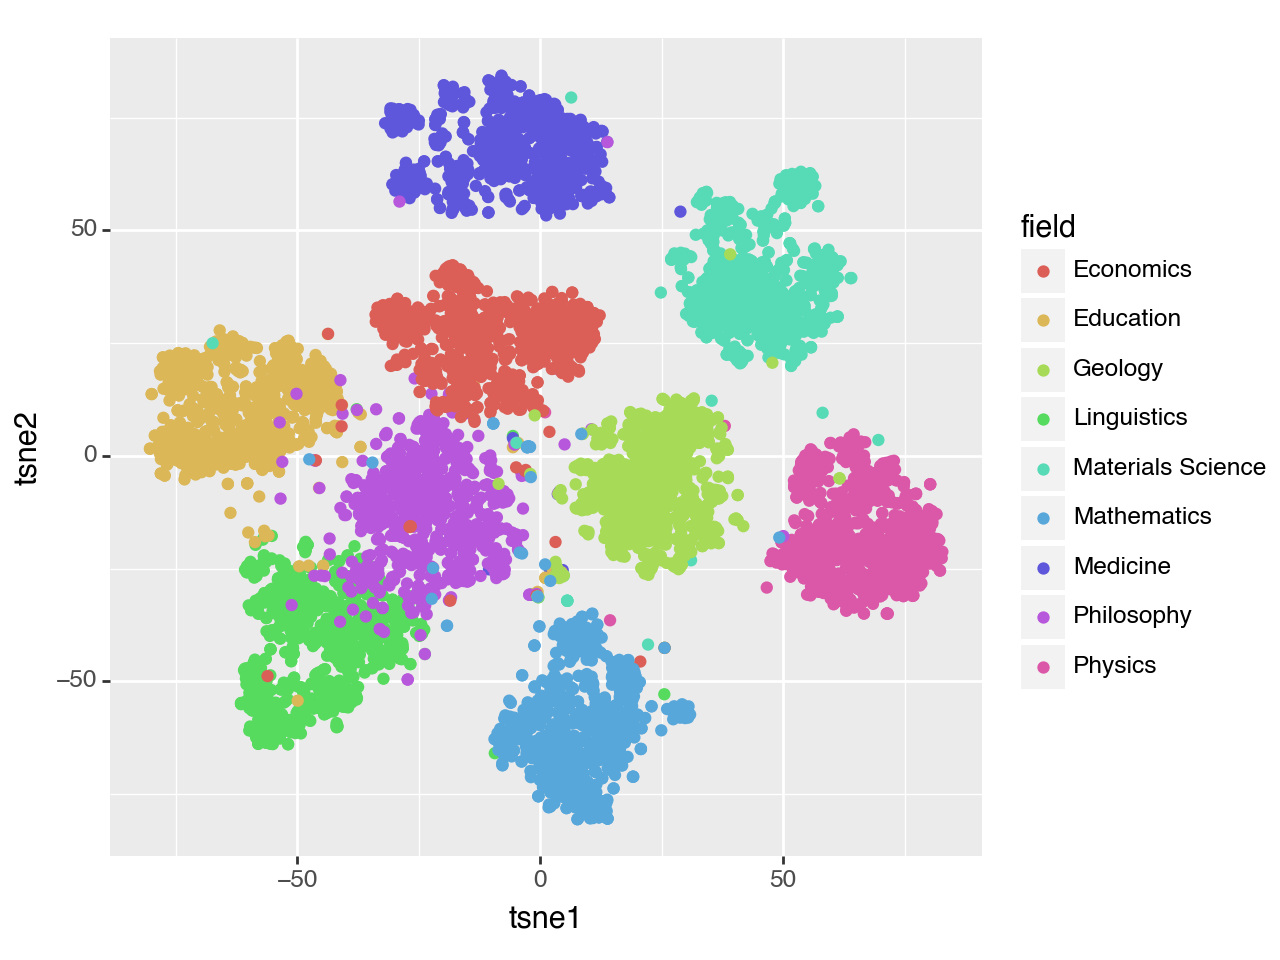

<Figure Size: (640 x 480)>

In [13]:
df_sbert = pd.DataFrame(
    zip(
        labels,
        embeddings_2d[:,0],
        embeddings_2d[:,1],
    ),
    columns=[
        "field",
        "tsne1",
        "tsne2",
    ],
)

(
    pn.ggplot(
        df_sbert,
        pn.aes(
            x="tsne1",
            y="tsne2",
            color="field",
        )
    )
    + pn.geom_point()
)

## Word2Vec

In [14]:
# Update the directories
atlas_dirs_w2v = {key: val.replace("SciBERT", "Word2Vec") for key, val in atlas_dirs_scibert.items()}

In [15]:
# This might be memory intensive.

atlases_by_field: dict[str, Atlas] = {
    key: Atlas.load(atlas_dirs_w2v[key]) for key in atlas_dirs_w2v
}

In [16]:
# Get first 100 embeddings
embeddings_by_field = {
    key: atl.projection.embeddings[:1000]  for key, atl in atlases_by_field.items()
}

# Concatenate, keeping labels
all_embeddings = np.vstack(list(embeddings_by_field.values()))
all_embeddings.shape # (900, 768)

labels = np.array([key for key in embeddings_by_field for _ in embeddings_by_field[key]])
labels.shape # (900,)

# N.B.: takes X min

# normalize embeddings
embeddings_n = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_n)
embeddings_2d.shape # (900, 2)


(9000, 2)

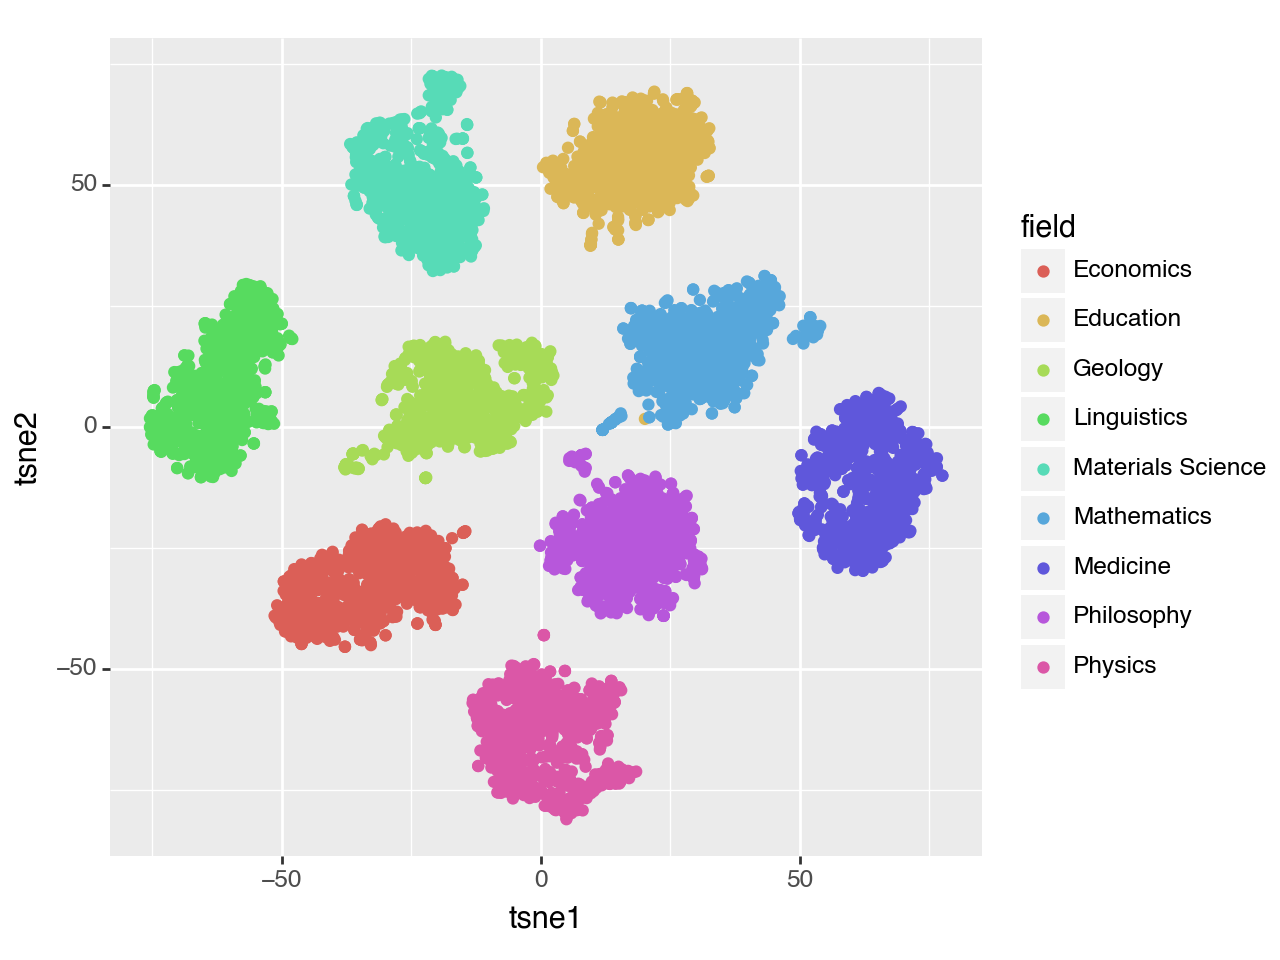

<Figure Size: (640 x 480)>

In [17]:
df_w2v = pd.DataFrame(
    zip(
        labels,
        embeddings_2d[:,0],
        embeddings_2d[:,1],
    ),
    columns=[
        "field",
        "tsne1",
        "tsne2",
    ],
)

(
    pn.ggplot(
        df_w2v,
        pn.aes(
            x="tsne1",
            y="tsne2",
            color="field",
        )
    )
    + pn.geom_point()
)

### BOW

In [23]:
# Update the directories
atlas_dirs_bow = {key: val.replace("SciBERT", "BOW") for key, val in atlas_dirs_scibert.items()}

# but we haven't completed yet so need to check they exist
import os
atlas_dirs_bow = {key: val for key, val in atlas_dirs_bow.items() if os.path.exists(val) and key != "Linguistics"}
atlas_dirs_bow.keys()

dict_keys(['Physics', 'Philosophy', 'Economics', 'Materials Science', 'Geology', 'Mathematics'])

In [29]:
# This might be memory intensive.

atlases_by_field: dict[str, Atlas] = {
    key: Atlas.load(atlas_dirs_bow[key]) for key in atlas_dirs_bow
}
atlases_by_field = {key:value for key,value in atlases_by_field.items() if value.projection is not None}

No publications to read, skipping.
No projection to read, skipping.
No bad_ids to read, skipping.
No history to read, skipping.
No center to read, skipping.
Loading empty atlas.


In [30]:
# Get first 100 embeddings
embeddings_by_field = {
    key: atl.projection.embeddings[:1000] for key, atl in atlases_by_field.items()
}

# Concatenate, keeping labels

# NOTE: We can't even do this, because all embeddings are of different shape! We'd need to define a meta atlas and cartographer and vectorizer to define one large vocabulary that's shared.

all_embeddings = np.vstack(list(embeddings_by_field.values()))
all_embeddings.shape # (900, 768)

labels = np.array([key for key in embeddings_by_field for _ in embeddings_by_field[key]])
labels.shape # (900,)

# N.B.: takes X min

# normalize embeddings
embeddings_n = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_n)
embeddings_2d.shape # (900, 2)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 23615 and the array at index 1 has size 18845

### GPT

In [4]:
# Update the directories
atlas_dirs_gpt = {key: val.replace("SciBERT", "GPT2") for key, val in atlas_dirs_scibert.items()}

# but we haven't completed yet so need to check they exist
import os
atlas_dirs_gpt = {key: val for key, val in atlas_dirs_gpt.items() if os.path.exists(val)}
atlas_dirs_gpt.keys()

dict_keys(['Physics', 'Linguistics', 'Medicine', 'Education'])

In [5]:
# This might be memory intensive.

atlases_by_field: dict[str, Atlas] = {
    key: Atlas.load(atlas_dirs_gpt[key]) for key in atlas_dirs_gpt
}

No history to read, skipping.


In [6]:
# Get first 100 embeddings
embeddings_by_field = {
    key: atl.projection.embeddings[:1000] for key, atl in atlases_by_field.items()
}

# Concatenate, keeping labels

# NOTE: We can't even do this, because all embeddings are of different shape! We'd need to define a meta atlas and cartographer and vectorizer to define one large vocabulary that's shared.

all_embeddings = np.vstack(list(embeddings_by_field.values()))
all_embeddings.shape # (900, 768)

labels = np.array([key for key in embeddings_by_field for _ in embeddings_by_field[key]])
labels.shape # (900,)

# N.B.: takes X min

# normalize embeddings
embeddings_n = all_embeddings / np.linalg.norm(all_embeddings, axis=1)[:, None]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_n)
embeddings_2d.shape # (900, 2)


(1003, 2)

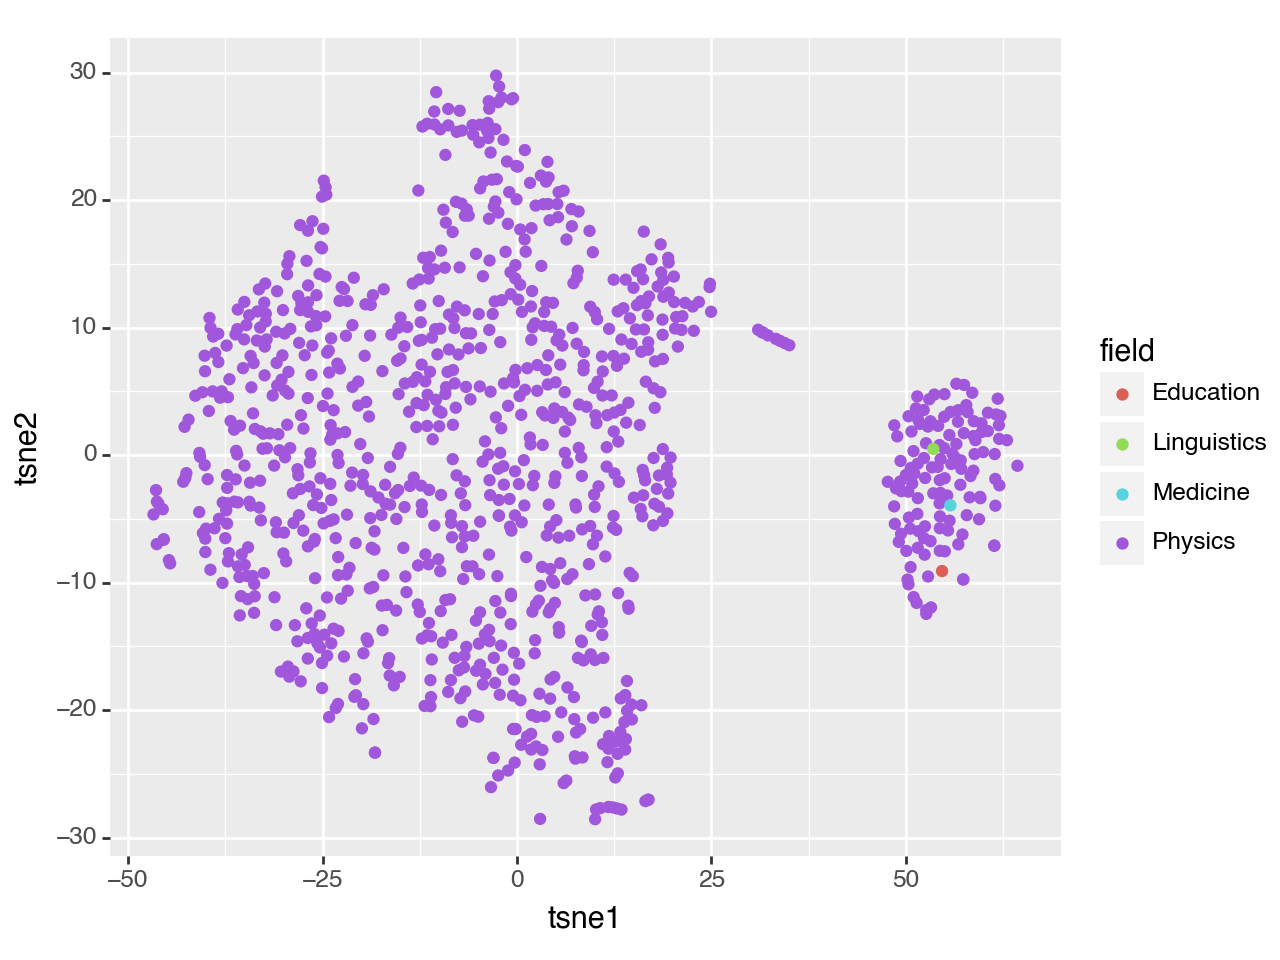

<Figure Size: (640 x 480)>

In [7]:
df_gpt = pd.DataFrame(
    zip(
        labels,
        embeddings_2d[:,0],
        embeddings_2d[:,1],
    ),
    columns=[
        "field",
        "tsne1",
        "tsne2",
    ],
)

(
    pn.ggplot(
        df_gpt,
        pn.aes(
            x="tsne1",
            y="tsne2",
            color="field",
        )
    )
    + pn.geom_point()
)

### Upshot: tighter clusters probably doesn't mean better similarity metric